In [22]:
print("HELLO!")

HELLO!


# 房價預測|

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 載入 Boston 房價資料集

In [24]:
with open('./housing.data', encoding='utf8') as f:
    data = f.readlines()
all_fields = []
for line in data:
    line2 = line[1:].replace('   ', ' ').replace('  ', ' ')
    fields = []
    for item in line2.split(' '):
        fields.append(float(item.strip()))
        if len(fields) == 14:
            all_fields.append(fields)
df = pd.DataFrame(all_fields)
df.columns = 'CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV'.split(',')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [26]:
# 描述統計量
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326717,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [27]:
# 描述統計量
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: ylabel='Count'>

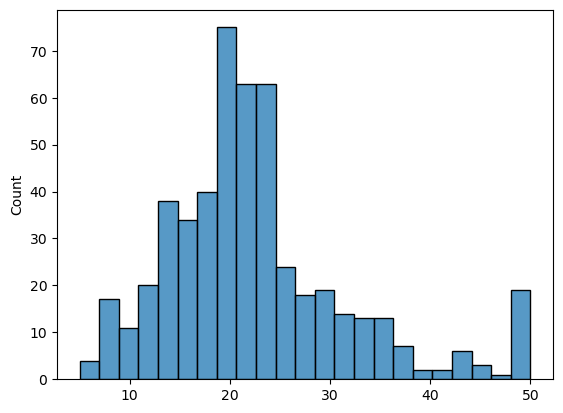

In [28]:
# 直方圖
import seaborn as sns

X, y = df.drop('MEDV', axis=1).values, df.MEDV.values
sns.histplot(x=y)

## 4. 資料分割

In [29]:
# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## 特徵縮放

In [30]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

## 6. 模型訓練

In [32]:
model.fit(X_train_std, y_train)

LinearRegression()

## 7. 模型評分

In [36]:
y_pred = model.predict(X_test_std)

In [37]:
y_pred,y_test

(array([22.8572154 , 17.62559488, 37.06451545, 32.84652682, 34.58627406,
        18.87051295, 38.25088312, 20.19300583, 43.58347325, 14.14946812,
        21.43475542, 27.9863419 , 17.57182223, 22.39012243, 18.91687357,
        37.14622628, 34.58507015, 14.74072771, 24.82328744, 20.6040225 ,
        20.77104525,  9.5920409 , 32.06947796, 12.23913386, 18.45400944,
        35.45038271, 13.57880457, 17.88788871, 25.2465734 , 33.62907124,
        16.28477541, 13.51679199, 27.99308019, 35.50331126, 27.54462351,
        11.53914972, 19.8872478 , 24.89574091, 32.49409191,  9.40314302,
        28.55546533, 23.2573193 , 26.24249269, 13.12224129, 27.4774373 ,
        22.41801889, 21.18844931, 27.950732  , 13.32460865, 16.87360475,
        21.19083301, 31.44865844, 13.3856433 , 18.19337459, 20.13591641,
        16.80364131, 29.37272667, 20.57515908, 27.7055874 , 22.64714309,
        13.87429086, 23.49549232, 15.75468524, 20.50825336, 25.98868314,
        19.65635894, 25.35908098,  7.49336643, 15.7

# 鳶尾花(Iris)品種的辨識

In [38]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 1. 載入資料集

In [40]:
ds = datasets.load_iris()

In [45]:
import pandas as pd
df = pd.DataFrame(ds.data,columns=ds.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
y = ds.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [49]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

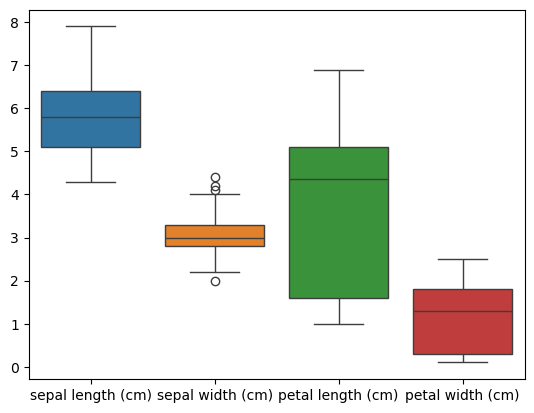

In [50]:
# 箱型圖
import seaborn as sns
sns.boxplot(data=df)

In [79]:
# 指定X，並轉為 Numpy 陣列
X = df.values

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [81]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [82]:
clf.fit(X_train_std,y_train)

LogisticRegression()

In [83]:
y_pred = clf.predict(X_test_std)
y_pred,y_test

(array([2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2,
        1, 1, 0, 0, 1, 0, 1, 2]),
 array([2, 0, 0, 2, 1, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 2,
        1, 1, 0, 0, 1, 0, 1, 2]))

In [84]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[12  0  0]
 [ 0  9  1]
 [ 0  1  7]]


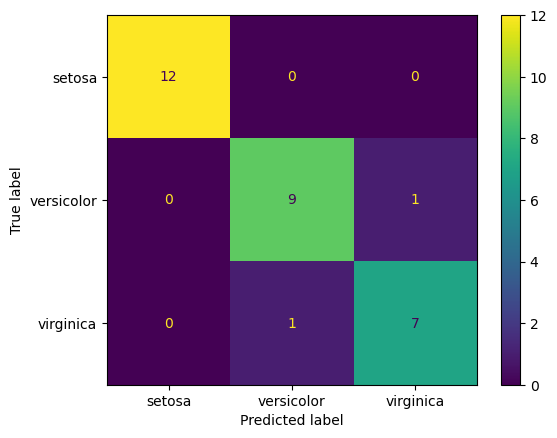

In [85]:
# 混淆矩陣圖
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)
                              , display_labels=ds.target_names)
disp.plot()
plt.show()

# 鳶尾花資料集群集測試

In [87]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [89]:
X, y = datasets.load_iris(return_X_y=True)

In [91]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init='k-means++', n_init='auto')

In [92]:
model.fit(X)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [93]:
# 計算準確率
y_pred = model.predict(X)

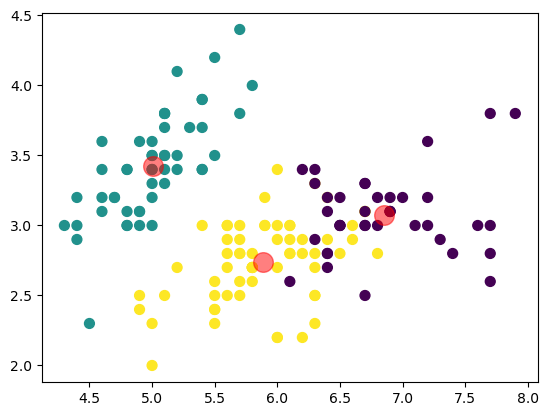

In [94]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

## Numpy複習

In [1]:
import numpy as np

In [26]:
my_list = [1,2,127]
type(my_list)

list

In [27]:
my_array = np.array(my_list,np.int8)
type(my_array)

numpy.ndarray

In [7]:
my_array.dtype

dtype('int8')

In [28]:
my_matrix = [[1,2,3],
             [4,5,6],
             [7,8,9]]
np.array(my_matrix)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### arange

在給定的間隔內返回均勻間隔的值。[[參考資料](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html)]

In [31]:
np.arange(0,11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [32]:
np.arange(0,11,2)

array([ 0,  2,  4,  6,  8, 10])

In [33]:
np.arange(11,0,-1)

array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [34]:
np.zeros(3)

array([0., 0., 0.])

In [39]:
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [40]:
np.linspace(0,10,3)

array([ 0.,  5., 10.])

In [41]:
np.linspace(0,5,20)

array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [43]:
newArray = np.eye(4) * 5
print(newArray)

[[5. 0. 0. 0.]
 [0. 5. 0. 0.]
 [0. 0. 5. 0.]
 [0. 0. 0. 5.]]


## Random 
NumPy也有許多方法來創建隨機數陣列：

### rand
創建一個給定形狀的陣列，並用來自於[0, 1)的均勻分布的隨機樣本填充它。[[參考資料](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.rand.html)]

In [59]:
np.random.rand(3)

array([0.34033599, 0.67659892, 0.18748779])

In [65]:
np.random.rand(3,2)

array([[0.07014365, 0.24988033],
       [0.34492567, 0.72601814],
       [0.84279917, 0.70387216]])

### randn

從“標準正態”分佈[σ = 1]返回樣本（或樣本）。與 **rand** 不同，靠近零的值更有可能出現。[[參考資料](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randn.html)]


標準正態分佈是一種特殊的常態分佈，其平均數（μ）為0，標準差（σ）為1。在標準正態分佈中，數據點主要集中在平均值附近，並且隨著距離平均值的增加而呈指數下降。這種分佈的曲線形狀呈鐘形，並且在平均值附近有一個尖峰。

在機器學習和統計學中，標準正態分佈通常用於建模和分析，並且在許多算法和技術中被廣泛應用。

In [71]:
np.random.randn(3)

array([ 0.17347283, -0.13104264,  1.01621156])

In [72]:
np.random.randn(5,5)

array([[-1.68573666, -1.86838557, -1.01369898,  0.08795594,  2.60167608],
       [-0.58955578,  1.55344433, -0.01171606, -1.16151486, -0.30431753],
       [-0.25627647, -0.50686348, -0.48469693, -1.30931897, -0.34279196],
       [-0.08463427, -0.1296175 ,  1.82757828,  0.83174002, -0.08842854],
       [-0.73069299,  0.18252208, -1.61344227, -1.16218639, -1.91600667]])

In [159]:
myData = np.random.randn(1000000)
print("mean:",myData.mean())
print("std:",myData.std())

mean: 0.0009732001070540518
std: 0.9987872378884778


### randint
從`low`（包含）到`high`（不包含）返回隨機整數。 [[參考資料](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)]

In [198]:
np.random.randint(1,100,10)

array([76, 98, 96, 78, 82, 45, 62, 97, 99, 53])

In [ ]:
# replace=False 表示不允许重复
np.random.choice([5,8,2,6,5,9,10,20],3,replace=False)

array([ 5,  6, 20])

In [238]:
arr = np.arange(1,100)
print(arr)
np.random.shuffle(arr)
print(arr)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[50 62 64 92 73 94 87 89 63  4 43 48  5  3 53 36 85 27 39 45 66 81  6 95
 69 41 59 96 49 30 42 28 19 20 88  8 37 74 78 23 31 54 93 58 22 33 10 35
 52 26 91 61 56 60 86 18 17 68 99 67 97 71 14 13 34 15 32 47 25 90 70 83
 12 77 57  9 24 82 55 72 11 65 76 84 46 75  7  1 51 80 21 40  2 79 38 98
 16 29 44]


### seed
可以用來設置隨機狀態，以便可以重現相同的“隨機”結果。[[參考資料](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html)]

In [258]:
np.random.seed(42)
np.random.randint(1,100,10)

array([52, 93, 15, 72, 61, 21, 83, 87, 75, 75])

## Reshape
返回一個包含相同數據但具有新形狀的陣列。[[參考資料](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)]

In [263]:
arr = np.arange(25)
print(arr)
newArray = arr.reshape(5,5)
print(newArray)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [265]:
newArray[0,3] = 100
print(newArray)

[[  0   1   2 100   4]
 [  5   6   7   8   9]
 [ 10  11  12  13  14]
 [ 15  16  17  18  19]
 [ 20  21  22  23  24]]


In [266]:
print(arr)

[  0   1   2 100   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24]


In [272]:
ranar = np.random.randint(0,50,10)
print(ranar)

[35 49 39  3  1  5 41  3 28 17]


In [273]:
ranar.max()

49

In [274]:
ranar.argmax()

1

In [275]:
ranar.min()

1

In [276]:
ranar.argmin()

4